In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sweetviz as sv
import dtale

import config

# 最大表示列数の指定（ここでは50列を指定）
pd.set_option("display.max_columns", 50)

In [7]:
df_methylation_promoters_rrbs = pd.read_table(
    config.RAW_BRCA_METABRIC_DIR + "/data_methylation_promoters_rrbs.txt", index_col=0
).T
df_methylation_promoters_rrbs

Hugo_Symbol,A2M,A4GALT,AAAS,AACS,AADACL2,AADAT,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARS,AARS2,AASDH,AASS,AATK,ABAT,ABCA1,ABCA17P,ABCA2,ABCA3,ABCA7,ABCB10,ABCB4,...,ZSCAN1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN22,ZSCAN25,ZSCAN30,ZSCAN31,ZSCAN32,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1
MB-0006,0.045031,0.017582,0.000000,0.000000,0.870370,0.012829,0.000786,0.000000,0.000000,0.000000,0.000000,0.024845,0.000000,0.000000,0.00000,0.003626,0.000000,0.006309,0.019417,0.000000,0.012270,0.368881,0.000000,0.000985,0.222656,...,0.000000,0.100457,0.000000,0.000000,0.001152,0.000941,0.000000,0.001012,0.002096,0.000000,0.000000,0.041176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.438356,0.000000,0.000,0.000000,0.000000,0.013445,0.002770
MB-0028,0.066532,0.038095,0.000000,0.019802,0.958763,0.049046,0.003300,0.000000,0.008511,0.010772,0.008000,0.229885,0.000000,0.011364,0.00000,0.009804,0.021472,0.011538,0.171429,0.007059,0.000000,0.324963,0.004866,0.006584,0.303523,...,0.020161,0.704545,0.000000,0.014327,0.012882,0.008439,0.018182,0.002933,0.019190,0.006757,0.011182,0.031746,0.004065,0.007605,0.000000,0.008759,0.008639,0.004717,0.290323,0.024096,0.000,0.000000,0.000000,0.008097,0.004566
MB-0035,0.015487,0.033333,0.000000,0.000000,0.987395,0.084432,0.002510,0.000000,0.000000,0.000000,0.002635,0.000000,0.000000,0.000000,0.00000,0.027473,0.013514,0.002525,0.348485,0.000000,0.000000,0.407871,0.000000,0.001127,0.586397,...,0.000000,0.810924,0.003344,0.005618,0.003279,0.000000,0.000000,0.010073,0.000000,0.343949,0.001761,0.798165,0.001942,0.000000,0.002639,0.000000,0.000000,0.000000,0.296610,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
MB-0046,0.102439,0.000000,0.000000,0.000000,0.965517,0.019714,0.000000,0.000000,0.000000,0.000000,0.002683,0.047059,0.000000,0.000000,0.00000,0.000000,0.013699,0.038610,0.254902,0.003044,0.004785,0.360360,0.000000,0.002446,0.247525,...,0.000000,0.493421,0.000000,0.000000,0.000000,0.000000,0.000000,0.004608,0.000000,0.000000,0.000000,0.092486,0.000000,0.000000,0.001488,0.000000,0.002950,0.000000,0.367647,0.000000,0.000,0.002331,0.000000,0.000000,0.000000
MB-0050,0.001905,0.009804,0.000000,0.000000,0.969231,0.011321,0.000895,0.000000,0.000000,0.001087,0.002516,0.057471,0.000000,0.000000,0.00000,0.020672,0.000000,0.025641,0.082645,0.002857,0.000000,0.326279,0.021097,0.001456,0.211470,...,0.042735,0.175676,0.000000,0.005128,0.002356,0.002141,0.000000,0.001953,0.003448,0.007109,0.000000,0.101449,0.001391,0.000000,0.000000,0.001894,0.000000,0.000000,0.135338,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7289,0.000000,0.062745,0.011811,0.000000,0.939163,0.061497,0.006718,0.000000,0.000000,0.003213,0.001008,0.015625,0.000000,0.000000,0.00000,0.000000,0.000000,0.018817,0.046512,0.003096,0.000000,0.191595,0.000000,0.004429,0.287273,...,0.000000,0.171053,0.000000,0.000000,0.000000,0.007174,0.000000,0.001493,0.001984,0.000000,0.002062,0.098039,0.000000,0.000000,0.000000,0.001543,0.000000,0.000000,0.214286,0.000000,0.000,0.000000,0.011173,0.005533,0.000000
MB-7291,0.177112,0.039773,0.003401,0.007194,0.921348,0.060305,0.004771,0.000000,0.000000,0.001443,0.001252,0.552239,0.008065,0.000000,0.00000,0.004301,0.015504,0.031746,0.362832,0.000000,0.000000,0.215364,0.003215,0.005785,0.228889,...,0.427419,0.159204,0.000000,0.027888,0.000000,0.004298,0.000000,0.001153,0.000000,0.000000,0.000000,0.086538,0.004184,0.000000,0.009494,0.000000,0.003378,0.004878,0.176923,0.008475,0.016,0.000000,0.000000,0.008869,0.002825
MB-7292,0.015464,0.007752,0.000000,0.000000,NaN,0.021792,0.009524,0.009804,0.022727,0.003322,0.006568,0.211538,0.000000,0.062500,0.00000,0.004132,0.021898,0.008065,0.524752,0.003322,0.006757,0.439506,0.000000,0.001524,0.138158,...,NaN,0.147059,0.00000

# 特徴量が重複していないか確認
遺伝子名が数多く存在するので、特徴量の名前に重複がないか確認する。

In [23]:
import collections

[
    k
    for k, v in collections.Counter(
        df_methylation_promoters_rrbs.columns.tolist()
    ).items()
    if v > 1
]

['PALM2AKAP2', 'S1PR3', 'ELMOD1', 'RAB34']

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


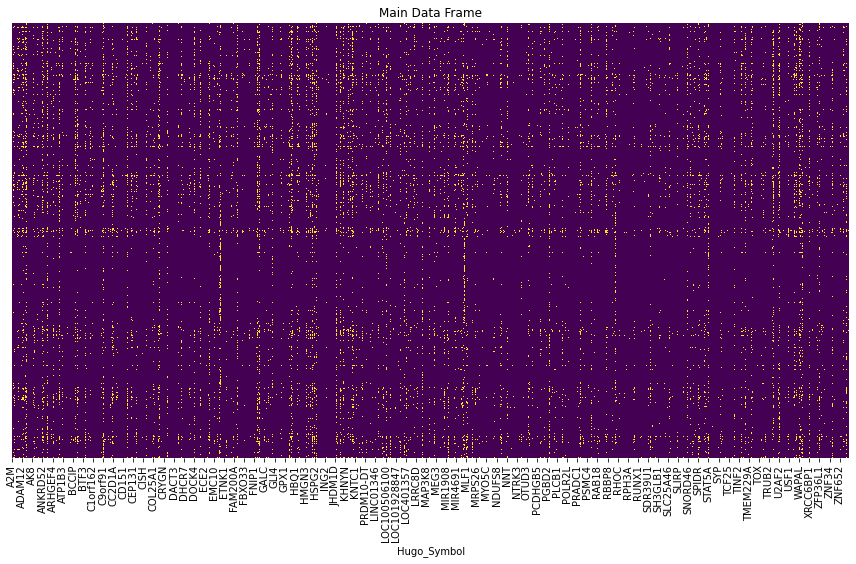

In [24]:
# Visualization of missing data
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(
    df_methylation_promoters_rrbs.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="viridis",
)
ax.set_title("Main Data Frame")
plt.show();

null値は相応にあるようだ。